<a href="https://colab.research.google.com/github/Varshini-svg/FOREST_FIRE_DETECTION/blob/main/FOREST_FIRE_DETECTION_USING_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# to download the data set from kaggle
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [2]:
# importing libraries and frameworks
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [3]:
# this is the code to check whether gpu is present or not
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print('GPU is being used.')
else:
    print('GPU is not being used.')

GPU is being used.


In [4]:
# this is used to load the dataset
train_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
val_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val'
test_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test'

# Define dataset_path (Choose either train_dir, val_dir, or test_dir)
dataset_path = train_dir # Changed 'train' to 'train_dir'

In [5]:
# List all the classes (Animal Types)
classes = os.listdir(dataset_path)
num_classes = len(classes)

# Display the number of classes along with names
print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')

Number of Classes: 2
Classes: ['nofire', 'fire']


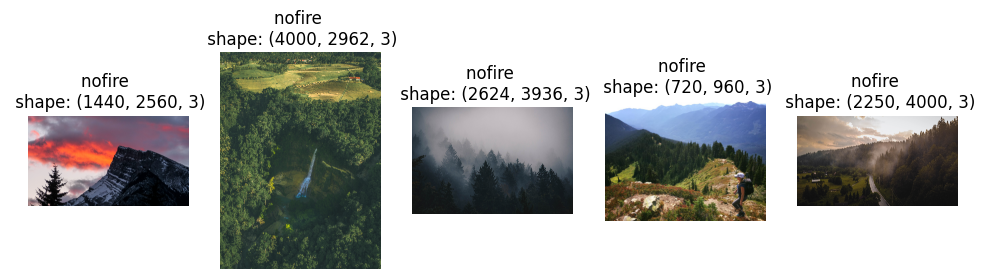

In [10]:
import matplotlib.pyplot as plt
import os
import random

plt.figure(figsize=(12, 10))

# Get a list of all image files in the class directory
class_path = os.path.join(train_dir, classes[0])  # Using classes[0] for this visualization
image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

# Select 5 random images to display
num_images_to_display = 5
selected_images = random.sample(image_files, num_images_to_display)

# Display the selected images
for i, image_file in enumerate(selected_images):
    img_path = os.path.join(class_path, image_file)
    img = plt.imread(img_path)

    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img)
    plt.title(f'{classes[0]} \n shape: {img.shape}')  # Using classes[0] for title
    plt.axis('off')

plt.show()

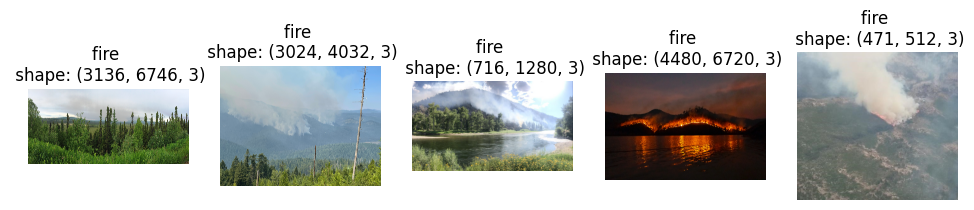

In [9]:
import matplotlib.pyplot as plt
import os
import random

plt.figure(figsize=(12, 10))

# Get a list of all image files in the class directory
class_path = os.path.join(train_dir, classes[1])
image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

# Select 5 random images to display
num_images_to_display = 5
selected_images = random.sample(image_files, num_images_to_display)

# Display the selected images
for i, image_file in enumerate(selected_images):
    img_path = os.path.join(class_path, image_file)
    img = plt.imread(img_path)

    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img)
    plt.title(f'{classes[1]} \n shape: {img.shape}')
    plt.axis('off')

plt.show()

In [12]:
from tensorflow.keras.preprocessing.image
import ImageDataGenerator

# Image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

val_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for validation
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # No need to shuffle validation data
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for testing
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # No need to shuffle test data
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [14]:
# Get class names from the training generator
class_mapping = train_generator.class_indices
class_names = list(class_mapping.keys())

# Print the class names
print("Class Names:", class_names)

# We can store the number of classes for later use
num_classes = len(class_names)
print("Number of Classes:", num_classes)

Class Names: ['fire', 'nofire']
Number of Classes: 2


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define input shape
input_shape = (img_width, img_height, 3)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),  # Added another convolutional layer
    MaxPooling2D(2, 2),                      # Added another max pooling layer
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 83s 7s/step


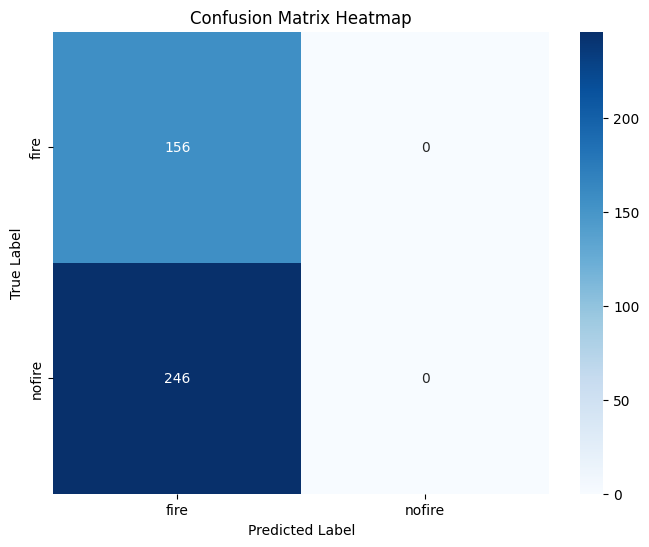

In [19]:
# heat map
!pip install seaborn scikit-learn

# Imports
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get predictions from model
y_pred = model.predict(val_generator, verbose=1)
y_pred_binary = (y_pred > 0.5).astype(int).flatten()

# Get true labels
y_true = val_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
